In [5]:
import os
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np

In [2]:
NUM_IMAGES_TRAINING_SET = 6800
NUM_BKG_TRAINING = 3400
NUM_SRC_TRAINING = 3400

In [3]:
data_path = '/Users/antonyzappacosta/Desktop/gamma_sources_identification/CNN_project/source_and_bkg_dataset'
# ASSUMING WE ARE DOING BINARY CLASSIFICATION
def load_data():
    # let's put directly images inside these arrays and not only image paths
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    train_bkg_count = 0
    train_src_count = 0

    for img_name in os.listdir(data_path):
        img_full_path = data_path + '/' + img_name
        image = cv2.imread(img_full_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.pyrDown(image)
        image = cv2.pyrDown(image)
        image = cv2.pyrDown(image)
        if img_name[0] == 'B': #background image
            if train_bkg_count < NUM_BKG_TRAINING: # append in training set
                x_train.append(image)
                y_train.append(0)
                train_bkg_count += 1
            else: # append in test set
                x_test.append(image)
                y_test.append(0)
        else: #source image
            if train_src_count < NUM_SRC_TRAINING:
                x_train.append(image)
                y_train.append(1)
                train_src_count += 1
            else: # append in test set
                x_test.append(image)
                y_test.append(1)

    # at the end of the for loop we should have the split dataset
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return (x_train, y_train), (x_test, y_test)

In [6]:
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6800, 63, 63)
(6800,)
(1200, 63, 63)
(1200,)


In [5]:
# ok so we have the whole loaded dataset. Each image is of course made of 3 channels. Let's see how a
# possible CNN behave

In [8]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# BUILING THE CONVOLUTIONAL NEURAL NETWORKS

In [8]:
import tensorflow as tf
from tensorflow import keras

2023-09-02 16:51:18.737582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
num_of_classes = 2

model = keras.Sequential()
#before we included all the layers in the "constructor of Sequential", but we can also do model.add
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(63, 63, 3))) # the input shape only in the first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) #just to fight overfitting, we drop some (neurons?)

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #sigmoid because we're doing binary classification.

In [10]:
# compile

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [14]:
# training the neural network
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10) #+20 = 30
#few epochs for avoiding overtraining

Epoch 1/10
45/45 [==============================] - 7s 156ms/step - loss: 0.2313 - acc: 0.8840 - val_loss: 0.4283 - val_acc: 0.8562
Epoch 2/10
45/45 [==============================] - 7s 144ms/step - loss: 0.2175 - acc: 0.8944 - val_loss: 0.6263 - val_acc: 0.8000
Epoch 3/10
45/45 [==============================] - 7s 152ms/step - loss: 0.2055 - acc: 0.9042 - val_loss: 0.4114 - val_acc: 0.8500
Epoch 4/10
45/45 [==============================] - 7s 146ms/step - loss: 0.2045 - acc: 0.8979 - val_loss: 0.7918 - val_acc: 0.7750
Epoch 5/10
45/45 [==============================] - 6s 144ms/step - loss: 0.2035 - acc: 0.8951 - val_loss: 0.5381 - val_acc: 0.8125
Epoch 6/10
45/45 [==============================] - 7s 147ms/step - loss: 0.2024 - acc: 0.8910 - val_loss: 0.8329 - val_acc: 0.7625
Epoch 7/10
45/45 [==============================] - 7s 158ms/step - loss: 0.1873 - acc: 0.9076 - val_loss: 0.8030 - val_acc: 0.7563
Epoch 8/10
45/45 [==============================] - 6s 134ms/step - loss: 0.

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

13/13 [==============================] - 0s 29ms/step - loss: 0.4109 - acc: 0.8475
Test Accuracy = 0.8475000262260437


## Now let's try to optimize the model and let's look at the results

In [16]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(63, 63, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [17]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [18]:
#from keras.utils import to_categorical
#y_train_one_hot = to_categorical(y_train, num_classes=2)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=5) #=15

Epoch 1/5
192/192 [==============================] - 25s 121ms/step - loss: 0.4422 - acc: 0.8278 - val_loss: 2.4801 - val_acc: 0.5265
Epoch 2/5
192/192 [==============================] - 24s 123ms/step - loss: 0.3185 - acc: 0.8703 - val_loss: 1.8853 - val_acc: 0.5265
Epoch 3/5
192/192 [==============================] - 24s 125ms/step - loss: 0.2497 - acc: 0.9072 - val_loss: 0.6419 - val_acc: 0.6529
Epoch 4/5
192/192 [==============================] - 24s 124ms/step - loss: 0.2074 - acc: 0.9203 - val_loss: 0.2439 - val_acc: 0.9088
Epoch 5/5
192/192 [==============================] - 23s 122ms/step - loss: 0.1907 - acc: 0.9253 - val_loss: 0.2515 - val_acc: 0.9074


In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

38/38 [==============================] - 2s 46ms/step - loss: 0.2299 - acc: 0.9025
Test Accuracy = 0.9024999737739563


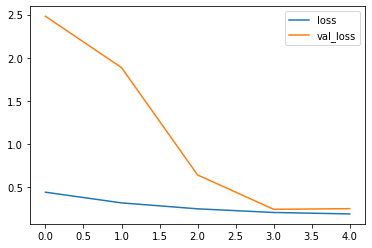

In [20]:
# Plot loss per iteration
r = history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

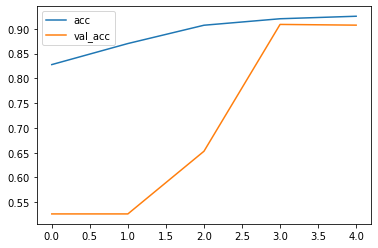

In [21]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label = 'val_acc')
plt.legend()

In [33]:
r.history['acc']

[0.9333333373069763]

In [22]:
model.save('classification_gamma_conv_model_0209-18e49.h5')
print('Model Saved!')

Model Saved!


/opt/miniconda3/envs/cta_simulation/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model.save('classification_gamma_conv_model_0209-18e49.keras')
print('Model Saved!')

Model Saved!


# Revised model architecture for uniformity with the localization architecture

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

num_of_classes = 2

# Define the input shape
input_shape = (63, 63, 1)
input_layer = Input(shape=input_shape)

# Convolutional layers
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
batchnorm1 = BatchNormalization()(conv1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)

conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
batchnorm2 = BatchNormalization()(conv2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

# Flatten layer
flatten = Flatten()(maxpool2)

# Dense layers with dropout
dense1 = Dense(128, activation='relu')(flatten)
batchnorm3 = BatchNormalization()(dense1)
dropout1 = Dropout(0.5)(batchnorm3)

dense2 = Dense(64, activation='relu')(dropout1)
batchnorm4 = BatchNormalization()(dense2)
dropout2 = Dropout(0.5)(batchnorm4)

# Output layer
output_layer = Dense(num_of_classes, activation='sigmoid')(dropout2)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)


In [10]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=1) #=6

192/192 [==============================] - 25s 130ms/step - loss: 0.1567 - acc: 0.9394 - val_loss: 0.2847 - val_acc: 0.9074


In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

38/38 [==============================] - 2s 44ms/step - loss: 0.2612 - acc: 0.9100
Test Accuracy = 0.9100000262260437


In [15]:
import visualkeras
from collections import defaultdict

In [25]:
color_map = defaultdict(dict)
color_map[Dense]['fill'] = 'brown'
color_map[Dropout]['fill'] = 'yellow'
visualkeras.layered_view(model, legend=True, color_map=color_map).show()